In [ ]:
#What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.

'''
->K-Means Clustering

How it works:
Partitional clustering algorithm.
Divides data into k clusters (you must specify k).
Minimizes intra-cluster variance.
Iteratively assigns points to the nearest cluster center (centroid) and updates centroids.

Use Case:
Customer Segmentation in Marketing:
Businesses use K-Means to segment customers based on purchasing behavior, demographics, or online activity to tailor marketing strategies.

Hierarchical Clustering

How it works:
Builds a hierarchy of clusters either bottom-up (agglomerative) or top-down (divisive).
Creates a dendrogram (tree-like structure).
Does not require pre-specifying the number of clusters (though you can "cut" the dendrogram to get a desired number).

Use Case:
Gene Expression Analysis in Bioinformatics:
Hierarchical clustering is used to group genes or samples with similar expression patterns, helping in identifying functionally related genes.
'''

In [ ]:
#Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

'''
->The Silhouette Score is a metric used to measure how well data points have been clustered. It helps evaluate the quality of the clusters formed by a clustering algorithm (like K-Means or Hierarchical Clustering).

What Does the Silhouette Score Measure?

For each data point, the Silhouette Score considers two things:

Cohesion (a):
How close the point is to other points in the same cluster.

Separation (b):
How far the point is from points in the nearest neighboring cluster.

Why Use It?

No Ground Truth Needed: It works without labeled data, making it perfect for unsupervised learning evaluation.
Cluster Validation: Helps determine how appropriate the number of clusters (k) is.

Example Usage

Imagine you're using K-Means and trying to decide the best number of clusters:
Try values of k from 2 to 10.
For each k, compute the average silhouette score across all data points.
'''

In [ ]:
#What are the core parameters of DBSCAN, and how do they influence the clustering process?

'''
->DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are densely packed and identifies outliers as noise.

It has two key parameters that control how it clusters data:

1. eps (Epsilon / Radius)

Definition:
The maximum distance between two points for them to be considered neighbors.

Influence:
A smaller eps value means clusters must be very dense (tight), potentially resulting in many small clusters or more noise.
A larger eps value makes it easier for points to be grouped, potentially causing distinct clusters to merge or reducing noise detection.

min_samples (Minimum Points)

Definition:
The minimum number of points required within eps radius for a point to be considered a core point.

Influence:
A larger min_samples increases the requirement for density, leading to fewer and larger clusters, and more points labeled as noise.
A smaller min_samples allows more clusters to form, possibly including spurious ones.
'''

In [ ]:
#Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

'''
->Clustering algorithms like K-Means and DBSCAN rely heavily on distance calculations (typically Euclidean distance) to determine how similar or close data points are.

What Is Feature Scaling?
Feature scaling is the process of standardizing or normalizing the range of independent variables (features) so that no single feature dominates the others due to its scale.

Why Is It Important?
1. Distance-Based Algorithms Are Sensitive to Scale
Both K-Means and DBSCAN use distances to form clusters:
K-Means: Assigns points to the nearest centroid.
DBSCAN: Groups points based on density within a given distance (eps).
If one feature has much larger values than another, it will dominate the distance calculation, causing the algorithm to ignore smaller-scale features.
'''

In [ ]:
#What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

'''
->The Elbow Method is a visual technique used to determine the optimal number of clusters (k) for K-Means clustering.
It helps you balance between underfitting and overfitting by finding a point where adding more clusters doesn’t significantly improve the clustering performance.

How Does It Work?
Run K-Means for a range of k values (e.g., 1 to 10).
For each k, compute the Within-Cluster Sum of Squares (WCSS), also called inertia:
WCSS measures how tightly the points in a cluster are grouped around the centroid.
Plot k (x-axis) vs. WCSS (y-axis).
Look for a point where the rate of decrease sharply slows down — this point is the "elbow".
'''

C:\Users\Soumya Shukla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


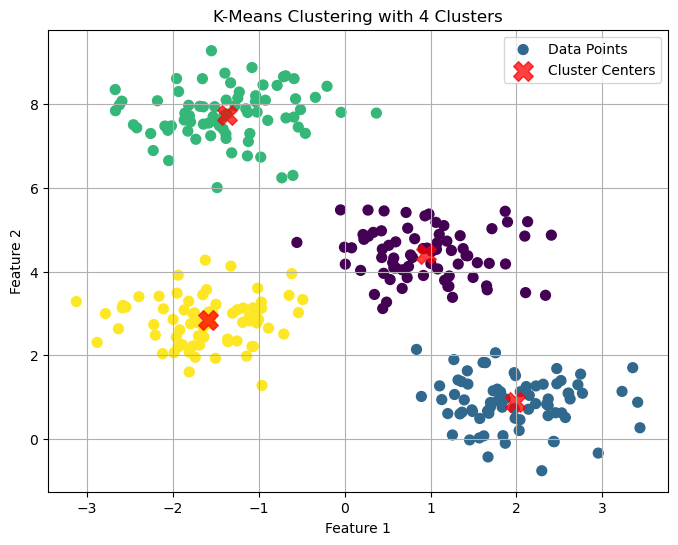

In [2]:
#Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Step 3: Visualize the clustered data and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Data Points')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Cluster Centers')

plt.title("K-Means Clustering with 4 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
#Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Wine dataset
data = load_wine()
X = data.data

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # You can tune these parameters
dbscan.fit(X_scaled)

# Step 4: Count number of clusters (excluding noise)
labels = dbscan.labels_

# Noise points are labeled as -1
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Number of clusters found (excluding noise): {n_clusters}")


Number of clusters found (excluding noise): 0


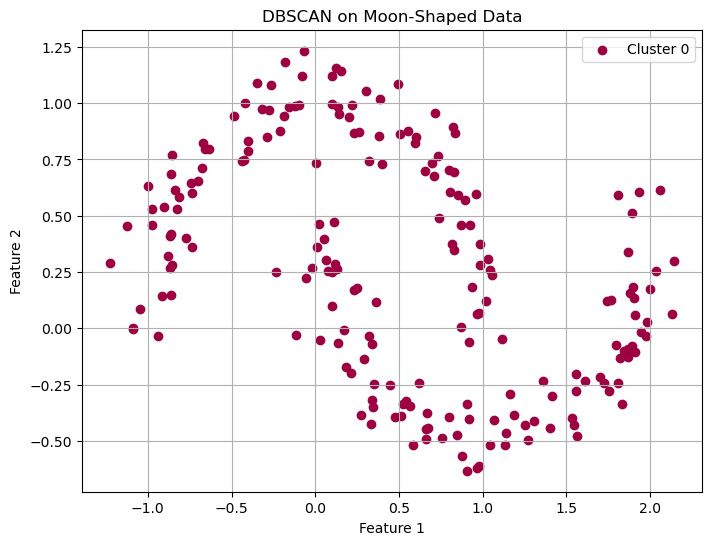

In [6]:
#Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Step 1: Generate moon-shaped data
X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # You can adjust these parameters
dbscan.fit(X)
labels = dbscan.labels_

# Step 3: Plot the results
plt.figure(figsize=(8, 6))

# Core and border points (non-noise)
unique_labels = set(labels)
colors = plt.cm.Spectral([float(i) / max(unique_labels | {1}) for i in unique_labels if i != -1])

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise (outliers)
        plt.scatter(X[labels == label, 0], X[labels == label, 1], 
                    c='red', marker='x', s=100, label='Outliers')
    else:
        # Clustered points
        plt.scatter(X[labels == label, 0], X[labels == label, 1], 
                    c=[color], label=f'Cluster {label}')

plt.title('DBSCAN on Moon-Shaped Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


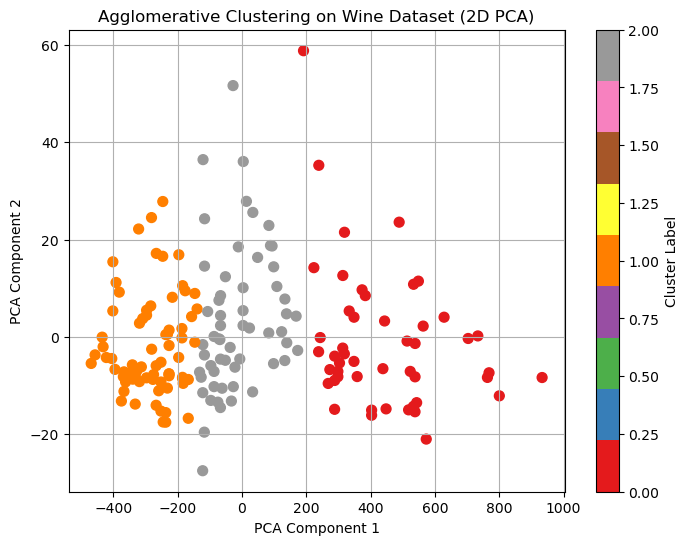

In [8]:
#Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load Wine dataset
data = load_wine()
X = data.data

# Step 2: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Apply Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)  # Wine dataset has 3 classes
labels = agg_clust.fit_predict(X_pca)

# Step 4: Visualize results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set1', s=50)
plt.title('Agglomerative Clustering on Wine Dataset (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()


In [ ]:
#You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.Describe your real-world data science workflow using clustering:● Which clustering algorithm(s) would you use and why?● How would you preprocess the data (missing values, scaling)?● How would you determine the number of clusters?● How would the marketing team benefit from your clustering analysis?

'''
->1. Choosing the Clustering Algorithm(s)
K-Means:
Suitable if the data is mostly numeric and clusters are expected to be spherical and roughly equal-sized.
Hierarchical Clustering:
Good for exploratory analysis, visualizing cluster relationships via dendrograms.

DBSCAN or HDBSCAN:
Useful if the data has noise/outliers or clusters with irregular shapes.
Gaussian Mixture Models (GMM):
If clusters are expected to overlap or have different shapes/densities.

2. Data Preprocessing
Handling Missing Values:
Identify missing data patterns.
Impute missing values using:
Mean/median for numeric features.
Feature Engineering:
Aggregate purchase history into meaningful features, e.g., total spend per category, frequency of purchases.

3. Determining the Number of Clusters
Use Elbow Method on K-Means inertia to identify the point of diminishing returns.
Use Silhouette Score to evaluate cluster separation and cohesion.
Examine Hierarchical dendrogram to see natural cluster splits.

4. Benefits for the Marketing Team
Targeted Promotions:
Tailor marketing campaigns to specific segments based on purchasing behavior and demographics, improving ROI.
Personalized Recommendations:
Recommend products popular within each cluster, boosting conversion.
Customer Retention:
Identify at-risk or low-engagement segments for focused retention strategies.
'''